In [1]:
import rasterio
from rasterio.windows import from_bounds, Window, get_data_window
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
import numpy as np

from rasterio.transform import Affine

In [49]:
dataset = rasterio.open("C:\\Users\\Szymon\\projects\\aoiw\\datasets\\orto2020.vrt")

patch = rasterio.open("C:\\Users\\Szymon\\projects\\aoiw\\datasets\\orto2020split\\orto2020split.6.tif")
patch = rasterio.open("C:\\Users\\Szymon\\projects\\aoiw\\datasets\\orto2020split\\orto2020split.41099.tif")


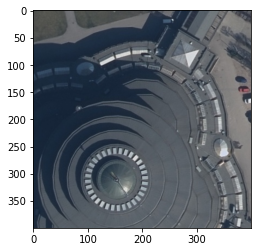

56400 83600
83327 56525


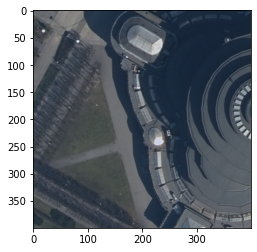

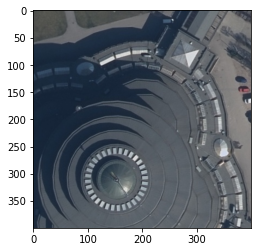

In [57]:
import math
def plot_rasterio_image(array: np.ndarray):
    image_array = np.moveaxis(array, 0, -1)
    plt.imshow(image_array)
    plt.show()

def get_randomly_shifted_image(dataset, image, shift_min_percent = 0.2, shift_max_percent = 0.8):
    image_width, image_height = image.width, image.height

    min_shift_x = math.floor(shift_min_percent * image_width)
    max_shift_x = math.floor(shift_max_percent * image_width)

    min_shift_y = math.floor(shift_min_percent * image_height)
    max_shift_y = math.floor(shift_max_percent * image_height)

    x_min_bound = 0
    x_max_bound = dataset.width - image_width
    y_min_bound = 0
    y_max_bound = dataset.height - image_height


    image_x, image_y = image.xy(0, 0)
    dataset_row, dataset_col = dataset.index(image_x, image_y)

    print(dataset_row, dataset_col)

    def valid_lower_point(threshold, value):
        return max(threshold, value)
    
    def valid_upper_point(threshold, value):
        return min(threshold, value)

    def valid_lower_x(x):
        return valid_lower_point(x_min_bound, x)
    
    def valid_lower_y(y):
        return valid_lower_point(y_min_bound, y)
    
    def valid_upper_x(x):
        return valid_upper_point(x_max_bound, x)
    
    def valid_upper_y(y):
        return valid_upper_point(y_max_bound, y)


    blex1 = np.arange(valid_lower_x(dataset_col - max_shift_x), valid_lower_x(dataset_col - min_shift_x))
    blex2 = np.arange(valid_upper_x(dataset_col + min_shift_x), valid_upper_x(dataset_col + max_shift_x))

    bley1 = np.arange(valid_lower_y(dataset_row - max_shift_y), valid_lower_y(dataset_row - min_shift_y))
    bley2 = np.arange(valid_upper_y(dataset_row + min_shift_y), valid_upper_y(dataset_row + max_shift_y))
    x_range = np.concatenate([
        blex1, blex2
    ])

    y_range = np.concatenate([
        bley1, bley2
    ])

    new_x = np.random.choice(x_range)
    new_y = np.random.choice(y_range)

    print(new_x, new_y)

    dataset_window = Window(new_x, new_y, image_width, image_height)
    d = dataset.read([1,2,3], window=dataset_window)
    plot_rasterio_image(d)
    p = patch.read([1,2,3])
    p1 = dataset.read([1,2,3], window=Window(dataset_col, dataset_row, image_width, image_height))
    plot_rasterio_image(p1)



p = patch.read([1,2,3])
plot_rasterio_image(p)


get_randomly_shifted_image(dataset, patch)



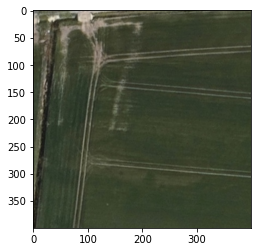

In [43]:
w=Window(5000, 5000, 400, 400)
d = dataset.read([1,2,3], window=w)
plot_rasterio_image(d)

In [19]:
window = get_data_window(xd)
window

NameError: name 'xd' is not defined

In [34]:
win_transform = dataset.window_transform(w)
win_transform

Affine(0.25, 0.0, 345105.2499997058,
       0.0, -0.25, 375944.7499988312)

In [19]:
offset_x = np.random.random_integers(-320, 320)
offset_y = np.random.random_integers(-320, 320)
offset_x, offset_y


BoundingBox(left=344505.2499997058, bottom=354323.7499988312, right=373487.7499997058, top=375944.7499988312)

In [20]:
dataset.bounds

BoundingBox(left=344505.2499997058, bottom=354323.7499988312, right=373487.7499997058, top=375944.7499988312)

In [21]:
dataset.transform.

Affine(0.25, 0.0, 344505.2499997058,
       0.0, -0.25, 375944.7499988312)

In [22]:
patch.transform

Affine(0.25, 0.0, 345105.25,
       0.0, -0.25, 375944.75)

In [23]:
patch.bounds

BoundingBox(left=345105.25, bottom=375844.75, right=345205.25, top=375944.75)

In [44]:
y = dataset.height * 2 // 3
x = dataset.width * 2 // 3
rst = dataset.read([1,2,3], window=Window(x, y, 400, 400))

In [45]:
new_x, new_y = x+offset_x, y+offset_y
new_x,new_y

(77145, 57339)

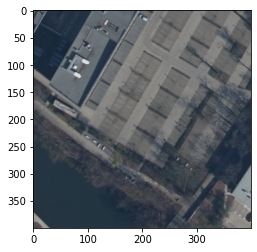

In [46]:

anchor = np.moveaxis(rst, 0, -1)
plt.imshow(anchor)
plt.show()

In [47]:
close = dataset.read([1,2,3], window=Window(new_x, new_y, 400, 400))

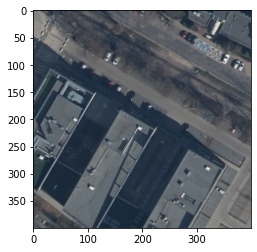

In [48]:
pos = np.moveaxis(close, 0, -1)
plt.imshow(pos)
plt.show()

In [112]:
row, col = dataset.index(362726.92,362330.49)

In [113]:
size = 400
school = dataset.read([1,2,3], window=Window(col-(size // 2), row-(size // 2), size, size))

school

array([[[118, 118, 124, ...,  32,  30,  31],
        [121, 125, 121, ...,  31,  32,  35],
        [123, 127, 124, ...,  31,  31,  33],
        ...,
        [ 38,  37,  36, ...,  93, 105, 106],
        [ 37,  36,  35, ..., 112, 135, 112],
        [ 37,  35,  34, ..., 125, 143, 105]],

       [[118, 118, 124, ...,  44,  42,  43],
        [121, 124, 120, ...,  43,  44,  44],
        [123, 126, 123, ...,  43,  43,  42],
        ...,
        [ 53,  54,  53, ...,  94, 106, 107],
        [ 52,  53,  52, ..., 113, 136, 113],
        [ 52,  52,  51, ..., 124, 142, 106]],

       [[118, 118, 124, ...,  60,  58,  57],
        [119, 122, 118, ...,  59,  60,  61],
        [121, 124, 121, ...,  59,  59,  59],
        ...,
        [ 74,  74,  73, ...,  99, 111, 111],
        [ 73,  73,  72, ..., 118, 140, 117],
        [ 73,  72,  71, ..., 129, 147, 110]]], dtype=uint8)

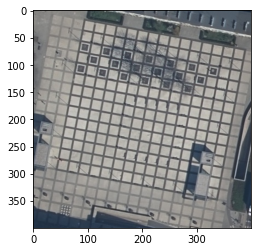

In [114]:
s = np.moveaxis(school, 0, -1)
plt.imshow(s)
plt.show()

In [95]:
dataset.bounds

BoundingBox(left=344505.2499997058, bottom=354323.7499988312, right=373487.7499997058, top=375944.7499988312)

In [96]:
from PIL import Image
im = Image.fromarray(s)
im.save("your_file.jpeg")